# Padaria Portugesa Geolocation

In [1]:
import pandas as pd
import numpy as np
from shapely.geometry import Polygon, Point
import geopandas as gp
import geoplot as gplt

In [2]:
freguesias = gp.read_file('data/freguesias.shp')
padarias = pd.read_csv('data/padarias.csv', index_col=0)

In [3]:
freguesias = freguesias[['NOME', 'AREA_M2', 'geometry']]

In [8]:
points = gp.GeoDataFrame(padarias, geometry=gp.points_from_xy(padarias['restaurant.location.longitude'], padarias['restaurant.location.latitude']))

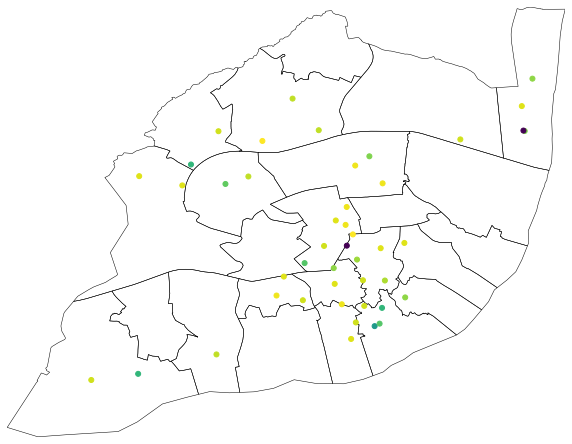

In [25]:
# get exterior of multipolygons
exterior = freguesias.unary_union
    
# remove points outside the city
points = points[points.geometry.within(exterior)]
           
# plot figure to see input data
ax = gplt.polyplot(freguesias, figsize=(10, 10), lw= .5, facecolor= 'none', edgecolor='k', alpha=1);
gplt.pointplot(points, ax=ax, extent=freguesias.total_bounds, hue='restaurant.user_rating.aggregate_rating');

In [20]:
points.columns

Index(['restaurant.R.has_menu_status.delivery',
       'restaurant.R.has_menu_status.takeaway', 'restaurant.R.res_id',
       'restaurant.apikey', 'restaurant.id', 'restaurant.name',
       'restaurant.url', 'restaurant.location.address',
       'restaurant.location.locality', 'restaurant.location.city',
       'restaurant.location.city_id', 'restaurant.location.latitude',
       'restaurant.location.longitude', 'restaurant.location.zipcode',
       'restaurant.location.country_id',
       'restaurant.location.locality_verbose',
       'restaurant.switch_to_order_menu', 'restaurant.cuisines',
       'restaurant.timings', 'restaurant.average_cost_for_two',
       'restaurant.price_range', 'restaurant.currency',
       'restaurant.highlights', 'restaurant.offers',
       'restaurant.opentable_support', 'restaurant.is_zomato_book_res',
       'restaurant.mezzo_provider', 'restaurant.is_book_form_web_view',
       'restaurant.book_form_web_view_url', 'restaurant.book_again_url',
       're

In [22]:
points['restaurant.user_rating.aggregate_rating']

0     4.1
1     3.8
2     3.9
3     4.0
4     3.8
5     4.1
6     3.8
7     3.9
8     4.0
9     3.4
10    4.0
11    4.0
12    3.9
13    3.9
14    3.9
15    3.8
16    4.0
17    3.9
18    3.9
19    3.4
0     3.7
1     3.9
2     2.7
3     3.7
4     2.7
5     2.2
6     3.7
7     3.7
9     3.8
13    3.8
15    3.0
16    3.8
17    3.1
18    3.8
19    3.6
2     3.9
3     2.7
4     3.4
8     3.0
10    3.5
14    3.3
17    0.0
19    3.3
0     4.0
6     0.0
Name: restaurant.user_rating.aggregate_rating, dtype: float64